In [1]:
#Data Storing
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import seaborn as sns
import matplotlib.cm as cm



#ML - Classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, log_loss, roc_auc_score, confusion_matrix, roc_curve, auc


# Data Cleaning

In [2]:
data=pd.read_csv("Karanda-Diabetic-Patients.csv")

In [3]:
data

,Encounter ID,EHR#,Race,Gender,Age,time_in_hospital,Speciality,Lab Procedures,# Of Procedures,# of Medication,...,Citoglipton,Insulin,Glyburide-metformin,glipizide-metformin,Glimepiride-pioglitazone,metformin-rosiglitazone,Metformin-pioglitazone,change,DiabetesMed,Readmitted
0,2278392,8222157,Shona,Female,[0-10),1,Pediatrics-Endocrinology,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Shona,Female,[10-20),3,?,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,Ndebele,Female,[20-30),2,?,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Shona,Male,[30-40),2,?,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Shona,Male,[40-50),1,?,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203527,443847548,100162476,Ndebele,Male,[70-80),3,?,51,0,16,...,No,Down,No,No,No,No,No,Ch,Yes,>30
203528,443847782,74694222,Ndebele,Female,[80-90),5,?,33,3,18,...,No,Steady,No,No,No,No,No,No,Yes,NO
203529,443854148,41088789,Shona,Male,[70-80),1,?,53,0,9,...,No,Down,No,No,No,No,No,Ch,Yes,NO
203530,443857166,31693671,Shona,Female,[80-90),10,Surgery-General,45,2,21,...,No,Up,No,No,No,No,No,Ch,Yes,NO


### Data Information

In [4]:
display(data.shape,data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203532 entries, 0 to 203531
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Encounter ID              203532 non-null  int64 
 1   EHR#                      203532 non-null  int64 
 2   Race                      203532 non-null  object
 3   Gender                    203532 non-null  object
 4   Age                       203532 non-null  object
 5   time_in_hospital          203532 non-null  int64 
 6   Speciality                203532 non-null  object
 7   Lab Procedures            203532 non-null  int64 
 8   # Of Procedures           203532 non-null  int64 
 9   # of Medication           203532 non-null  int64 
 10  Outpatient #              203532 non-null  int64 
 11  Inpatient #               203532 non-null  int64 
 12  Diagnosis 1               203532 non-null  object
 13  Diagnosis 2               203532 non-null  object
 14  Diag

(203532, 44)

None

In [5]:
display(data.head(),data.tail())

,Encounter ID,EHR#,Race,Gender,Age,time_in_hospital,Speciality,Lab Procedures,# Of Procedures,# of Medication,...,Citoglipton,Insulin,Glyburide-metformin,glipizide-metformin,Glimepiride-pioglitazone,metformin-rosiglitazone,Metformin-pioglitazone,change,DiabetesMed,Readmitted
0,2278392,8222157,Shona,Female,[0-10),1,Pediatrics-Endocrinology,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Shona,Female,[10-20),3,?,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,Ndebele,Female,[20-30),2,?,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Shona,Male,[30-40),2,?,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Shona,Male,[40-50),1,?,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


,Encounter ID,EHR#,Race,Gender,Age,time_in_hospital,Speciality,Lab Procedures,# Of Procedures,# of Medication,...,Citoglipton,Insulin,Glyburide-metformin,glipizide-metformin,Glimepiride-pioglitazone,metformin-rosiglitazone,Metformin-pioglitazone,change,DiabetesMed,Readmitted
203527,443847548,100162476,Ndebele,Male,[70-80),3,?,51,0,16,...,No,Down,No,No,No,No,No,Ch,Yes,>30
203528,443847782,74694222,Ndebele,Female,[80-90),5,?,33,3,18,...,No,Steady,No,No,No,No,No,No,Yes,NO
203529,443854148,41088789,Shona,Male,[70-80),1,?,53,0,9,...,No,Down,No,No,No,No,No,Ch,Yes,NO
203530,443857166,31693671,Shona,Female,[80-90),10,Surgery-General,45,2,21,...,No,Up,No,No,No,No,No,Ch,Yes,NO
203531,443867222,175429310,Shona,Male,[70-80),6,?,13,3,3,...,No,No,No,No,No,No,No,No,No,NO


In [6]:
missing_values = data.isnull().sum()

# Display columns with missing values
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

Missing Values in Each Column:
max_glu_serum    192840
A1Cresult        169496
dtype: int64


In [7]:
data.isnull().sum()

Encounter ID                     0
EHR#                             0
Race                             0
Gender                           0
Age                              0
time_in_hospital                 0
Speciality                       0
Lab Procedures                   0
# Of Procedures                  0
# of Medication                  0
Outpatient #                     0
Inpatient #                      0
Diagnosis 1                      0
Diagnosis 2                      0
Diagnosis 3                      0
 # of diagnoses                  0
max_glu_serum               192840
A1Cresult                   169496
Metformin                        0
Repaglinide                      0
Nateglinide                      0
Chlorpropamide                   0
Glimepiride                      0
Acetohexamide                    0
Glipizide                        0
Glyburide                        0
Tolbutamide                      0
Pioglitazone                     0
Rosiglitazone       

## Possible Areas that need changes

* For Column Race , Unknown race and Other_EthnicGroups will be grouped to be one represented by Other_Ethnic_Groups
* Uknown_Invalid Gender will be dropped from the data 
* Unknown Specialist with be named Other , Similar names will be grouped together e.g Surgery-Vascular and SurgicalSpecialty will be grouped to Surgery
* Encounter ID , EHR# , Lab Procedures , Nu Of Procedures ,no of Medication,Outpatient # , Inpatient # ,Diagnosis 1,Diagnosis 2,Diagnosis 3,# of diagnoses,will be dropped 
* max_glu_serum , A1Cresult   have missing values which will be inputted using None
* Group readmitted to Yes and No

In [8]:
columns_to_drop = ['Encounter ID','change', 'EHR#', 'Lab Procedures', '# Of Procedures', '# of Medication', 'Outpatient #', 'Inpatient #', 'Diagnosis 1', 'Diagnosis 2', 'Diagnosis 3', ' # of diagnoses']
data = data.drop(columns=columns_to_drop)

In [9]:
data = data.fillna('No Value')

In [10]:
data['Race'] = data['Race'].replace(['Unknown race', 'Other_EthnicGroups'], 'Other_Ethnic_Groups')

In [11]:
data = data[data['Gender'] != 'Unknown/Invalid']

In [12]:
data['Speciality'] = data['Speciality'].replace({
    '?': 'Other',
    'PhysicianNotFound': 'Other',
    'Anesthesiology-Pediatric': 'Anesthesiology',
    'Cardiology-Pediatric': 'Cardiology',
    'Endocrinology-Metabolism': 'Endocrinology',
    'Obsterics&Gynecology-GynecologicOnco': 'Gynecology',
    'Obstetrics': 'Gynecology',
    'Hematology/Oncology': 'Hematology',
    'Neurophysiology': 'Neurology',
    'Orthopedics-Reconstructive': 'Orthopedics',
    'Pediatrics-AllergyandImmunology': 'Pediatrics',
    'Pediatrics-CriticalCare': 'Pediatrics',
    'Pediatrics-EmergencyMedicine': 'Pediatrics',
    'Pediatrics-Endocrinology': 'Pediatrics',
    'Pediatrics-Hematology-Oncology': 'Pediatrics',
    'Pediatrics-InfectiousDiseases': 'Pediatrics',
    'Pediatrics-Neurology': 'Pediatrics',
    'Pediatrics-Pulmonology': 'Pediatrics',
    'PlasticSurgery': 'Surgery',
    'Psychiatry-Addictive': 'Psychiatry',
    'Psychiatry-Child/Adolescent': 'Psychiatry',
    'Radiologist': 'Radiology',
    'Surgery-Cardiovascular': 'Surgery',
    'Surgery-Cardiovascular/Thoracic': 'Surgery',
    'Surgery-Colon&Rectal': 'Surgery',
    'Surgery-General': 'Surgery',
    'Surgery-Maxillofacial': 'Surgery',
    'Surgery-Neuro': 'Surgery',
    'Surgery-Pediatric': 'Surgery',
    'Surgery-Plastic': 'Surgery',
    'Surgery-PlasticwithinHeadandNeck': 'Surgery',
    'Surgery-Thoracic': 'Surgery',
    'Surgery-Vascular': 'Surgery',
    'SurgicalSpecialty': 'Surgery',
    'Surgeon': 'Surgery',
    'Gynecology': 'ObstetricsandGynecology',
})

In [13]:
age_bins = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

data['Age'] = data['Age'].replace(age_bins, age_labels)

In [14]:
# Group 'Readmitted' into 'Yes' and 'No'
data['Readmitted'] = data['Readmitted'].replace({'<30': 'Yes', '>30': 'Yes', 'NO': 'No'})

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203526 entries, 0 to 203531
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Race                      203526 non-null  object
 1   Gender                    203526 non-null  object
 2   Age                       203526 non-null  object
 3   time_in_hospital          203526 non-null  int64 
 4   Speciality                203526 non-null  object
 5   max_glu_serum             203526 non-null  object
 6   A1Cresult                 203526 non-null  object
 7   Metformin                 203526 non-null  object
 8   Repaglinide               203526 non-null  object
 9   Nateglinide               203526 non-null  object
 10  Chlorpropamide            203526 non-null  object
 11  Glimepiride               203526 non-null  object
 12  Acetohexamide             203526 non-null  object
 13  Glipizide                 203526 non-null  object
 14  Glyburide

In [16]:
display(data.head(),data.tail())

,Race,Gender,Age,time_in_hospital,Speciality,max_glu_serum,A1Cresult,Metformin,Repaglinide,Nateglinide,...,Examide,Citoglipton,Insulin,Glyburide-metformin,glipizide-metformin,Glimepiride-pioglitazone,metformin-rosiglitazone,Metformin-pioglitazone,DiabetesMed,Readmitted
0,Shona,Female,0-10,1,Pediatrics,No Value,No Value,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Shona,Female,10-20,3,Other,No Value,No Value,No,No,No,...,No,No,Up,No,No,No,No,No,Yes,Yes
2,Ndebele,Female,20-30,2,Other,No Value,No Value,No,No,No,...,No,No,No,No,No,No,No,No,Yes,No
3,Shona,Male,30-40,2,Other,No Value,No Value,No,No,No,...,No,No,Up,No,No,No,No,No,Yes,No
4,Shona,Male,40-50,1,Other,No Value,No Value,No,No,No,...,No,No,Steady,No,No,No,No,No,Yes,No


,Race,Gender,Age,time_in_hospital,Speciality,max_glu_serum,A1Cresult,Metformin,Repaglinide,Nateglinide,...,Examide,Citoglipton,Insulin,Glyburide-metformin,glipizide-metformin,Glimepiride-pioglitazone,metformin-rosiglitazone,Metformin-pioglitazone,DiabetesMed,Readmitted
203527,Ndebele,Male,70-80,3,Other,No Value,>8,Steady,No,No,...,No,No,Down,No,No,No,No,No,Yes,Yes
203528,Ndebele,Female,80-90,5,Other,No Value,No Value,No,No,No,...,No,No,Steady,No,No,No,No,No,Yes,No
203529,Shona,Male,70-80,1,Other,No Value,No Value,Steady,No,No,...,No,No,Down,No,No,No,No,No,Yes,No
203530,Shona,Female,80-90,10,Surgery,No Value,No Value,No,No,No,...,No,No,Up,No,No,No,No,No,Yes,No
203531,Shona,Male,70-80,6,Other,No Value,No Value,No,No,No,...,No,No,No,No,No,No,No,No,No,No


## Exploratory Data Analysis

### Descriptive Statistics

In [17]:
# Separate numerical and categorical columns
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Display the lists of numerical and categorical columns
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['time_in_hospital']
Categorical Columns: ['Race', 'Gender', 'Age', 'Speciality', 'max_glu_serum', 'A1Cresult', 'Metformin', 'Repaglinide', 'Nateglinide', 'Chlorpropamide', 'Glimepiride', 'Acetohexamide', 'Glipizide', 'Glyburide', 'Tolbutamide', 'Pioglitazone', 'Rosiglitazone', 'Acarbose', 'Miglitol', 'Troglitazone', 'Tolazamide', 'Examide', 'Citoglipton', 'Insulin', 'Glyburide-metformin', 'glipizide-metformin', 'Glimepiride-pioglitazone', 'metformin-rosiglitazone', 'Metformin-pioglitazone', 'DiabetesMed', 'Readmitted']


In [18]:
# Descriptive statistics for numerical columns
numerical_descriptive = data.describe()
print("Descriptive Statistics for Numerical Columns:")
numerical_descriptive

Descriptive Statistics for Numerical Columns:


,time_in_hospital
count,203526.000000
mean,4.396018
std,2.985085
min,1.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,14.000000


In [19]:
# Descriptive statistics for categorical columns
categorical_descriptive = data.describe(include=['object', 'category'])
print("\nDescriptive Statistics for Categorical Columns:")
categorical_descriptive


Descriptive Statistics for Categorical Columns:


,Race,Gender,Age,Speciality,max_glu_serum,A1Cresult,Metformin,Repaglinide,Nateglinide,Chlorpropamide,...,Examide,Citoglipton,Insulin,Glyburide-metformin,glipizide-metformin,Glimepiride-pioglitazone,metformin-rosiglitazone,Metformin-pioglitazone,DiabetesMed,Readmitted
count,203526,203526,203526,203526,203526,203526,203526,203526,203526,203526,...,203526,203526,203526,203526,203526,203526,203526,203526,203526,203526
unique,7,2,10,41,4,4,4,4,4,4,...,1,1,4,4,2,2,2,2,2,2
top,Shona,Female,70-80,Other,No Value,No Value,No,No,No,No,...,No,No,No,No,No,No,No,No,Yes,No
freq,152176,109416,52132,99916,192834,169490,163552,200448,202120,203354,...,203526,203526,94760,202114,203500,203524,203522,203524,156722,109722


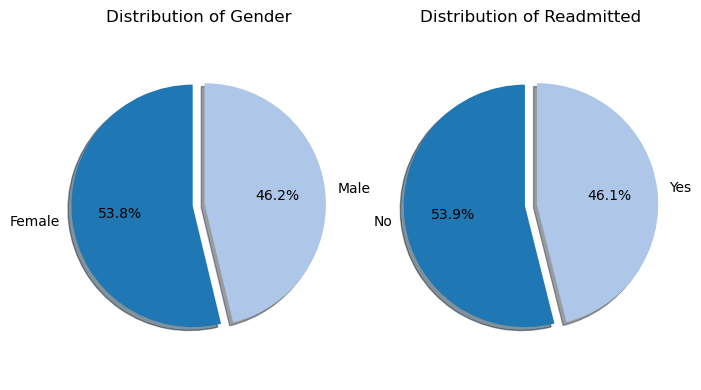

In [20]:
# Features to plot
features = ['Gender', 'Readmitted']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(7, 4))

# Define a blue color palette
blue_colors = ['#1f77b4', '#aec7e8', '#17becf', '#7f7f7f']

# Function to plot each feature as a 3D-like pie chart
def plot_3d_pie(ax, data, col):
    x = data[col].value_counts()
    # Explode the pie chart
    explode = [0.05] * len(x)  # Create an explode array for all slices

    # Plot the pie chart with shadow for 3D effect
    ax.pie(x.values, explode=explode, labels=x.index,
           autopct='%1.1f%%', colors=blue_colors[:len(x)],
           shadow=True, startangle=90)  # Add shadow

    ax.set_title(f'Distribution of {col.capitalize()}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


# Plot each feature
for i, col in enumerate(features):
    ax = axes[i]
    plot_3d_pie(ax, data, col)

# Adjust layout
plt.tight_layout()
plt.show()

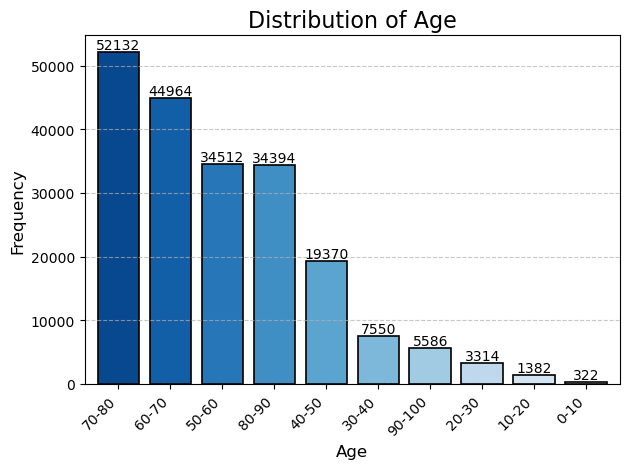

In [21]:
# Define a blue color palette with variations
blue_palette = sns.color_palette("Blues_r", n_colors=len(data["Age"].unique()))

# Create the bar chart with enhanced visuals
plt.figure()  # Adjust figure size if needed
ax = data["Age"].value_counts().plot(kind="bar", color=blue_palette, width=0.8, edgecolor='black', linewidth=1.2)

# Customize the plot
plt.title("Distribution of Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels if needed
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

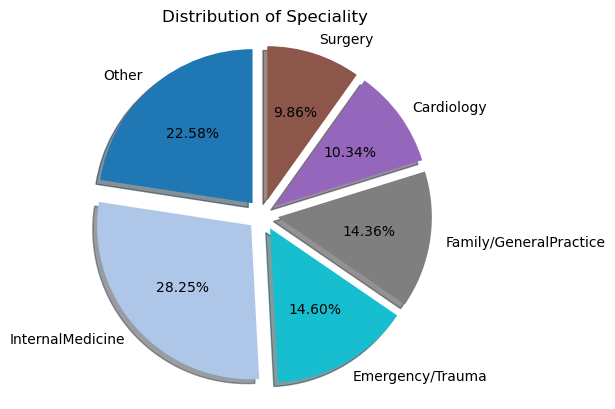

In [22]:
# Calculate value counts for 'Speciality'
claim_code_counts = data["Speciality"].value_counts()

# Define a threshold for grouping smaller categories
threshold = 0.05 

# Create a new DataFrame with grouped categories
grouped_counts = claim_code_counts[claim_code_counts / claim_code_counts.sum() >= threshold]
other_counts = claim_code_counts[claim_code_counts / claim_code_counts.sum() < threshold].sum()

# Add 'Other' category to the grouped counts
grouped_counts['Other'] = other_counts

# Define a blue color palette
blue_colors = ['#1f77b4', '#aec7e8', '#17becf', '#7f7f7f', '#9467bd', '#8c564b']  

# Plot the 3D pie chart
fig, ax = plt.subplots()

# Explode the pie chart
explode = [0.1] * len(grouped_counts)  

# Plot the pie chart with shadow and blue colors for 3D effect
ax.pie(grouped_counts.values, explode=explode, labels=grouped_counts.index,
       autopct="%.2f%%", shadow=True, startangle=90, colors=blue_colors[:len(grouped_counts)]) 

ax.set_title("Distribution of Speciality")
ax.axis('equal')  

plt.show()

# Supervised Machine Learning

* Since our dependent variable is categorical I will use classification model

In [23]:
data.columns

Index(['Race', 'Gender', 'Age', 'time_in_hospital', 'Speciality',
       'max_glu_serum', 'A1Cresult', 'Metformin', 'Repaglinide', 'Nateglinide',
       'Chlorpropamide', 'Glimepiride', 'Acetohexamide', 'Glipizide',
       'Glyburide', 'Tolbutamide', 'Pioglitazone', 'Rosiglitazone', 'Acarbose',
       'Miglitol', 'Troglitazone', 'Tolazamide', 'Examide', 'Citoglipton',
       'Insulin', 'Glyburide-metformin', 'glipizide-metformin',
       'Glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'Metformin-pioglitazone', 'DiabetesMed', 'Readmitted'],
      dtype='object')

In [24]:
'''additional_columns_to_drop = ['max_glu_serum', 'A1Cresult', 'Metformin', 'Repaglinide', 'Nateglinide',
       'Chlorpropamide', 'Glimepiride', 'Acetohexamide', 'Glipizide',
       'Glyburide', 'Tolbutamide', 'Pioglitazone', 'Rosiglitazone', 'Acarbose',
       'Miglitol', 'Troglitazone', 'Tolazamide', 'Examide', 'Citoglipton',
       'Insulin', 'Glyburide-metformin', 'glipizide-metformin',
       'Glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'Metformin-pioglitazone', 'DiabetesMed']
data = data.drop(columns=additional_columns_to_drop)'''

"additional_columns_to_drop = ['max_glu_serum', 'A1Cresult', 'Metformin', 'Repaglinide', 'Nateglinide',\n       'Chlorpropamide', 'Glimepiride', 'Acetohexamide', 'Glipizide',\n       'Glyburide', 'Tolbutamide', 'Pioglitazone', 'Rosiglitazone', 'Acarbose',\n       'Miglitol', 'Troglitazone', 'Tolazamide', 'Examide', 'Citoglipton',\n       'Insulin', 'Glyburide-metformin', 'glipizide-metformin',\n       'Glimepiride-pioglitazone', 'metformin-rosiglitazone',\n       'Metformin-pioglitazone', 'DiabetesMed']\ndata = data.drop(columns=additional_columns_to_drop)"

In [25]:
data

,Race,Gender,Age,time_in_hospital,Speciality,max_glu_serum,A1Cresult,Metformin,Repaglinide,Nateglinide,...,Examide,Citoglipton,Insulin,Glyburide-metformin,glipizide-metformin,Glimepiride-pioglitazone,metformin-rosiglitazone,Metformin-pioglitazone,DiabetesMed,Readmitted
0,Shona,Female,0-10,1,Pediatrics,No Value,No Value,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Shona,Female,10-20,3,Other,No Value,No Value,No,No,No,...,No,No,Up,No,No,No,No,No,Yes,Yes
2,Ndebele,Female,20-30,2,Other,No Value,No Value,No,No,No,...,No,No,No,No,No,No,No,No,Yes,No
3,Shona,Male,30-40,2,Other,No Value,No Value,No,No,No,...,No,No,Up,No,No,No,No,No,Yes,No
4,Shona,Male,40-50,1,Other,No Value,No Value,No,No,No,...,No,No,Steady,No,No,No,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203527,Ndebele,Male,70-80,3,Other,No Value,>8,Steady,No,No,...,No,No,Down,No,No,No,No,No,Yes,Yes
203528,Ndebele,Female,80-90,5,Other,No Value,No Value,No,No,No,...,No,No,Steady,No,No,No,No,No,Yes,No
203529,Shona,Male,70-80,1,Other,No Value,No Value,Steady,No,No,...,No,No,Down,No,No,No,No,No,Yes,No
203530,Shona,Female,80-90,10,Surgery,No Value,No Value,No,No,No,...,No,No,Up,No,No,No,No,No,Yes,No


In [26]:
y = data['Readmitted']
data=data.drop('Readmitted',axis=1)

In [27]:
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
X = data[categorical_features + numerical_features]

In [28]:
# Define the preprocessing steps for categorical and numerical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')) 
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create a ColumnTransformer to apply the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
}

# Create a pipeline for each model
pipelines = {}
for model_name, model in models.items():
    pipelines[model_name] = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create a DataFrame to store the evaluation metrics
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Train and evaluate each pipeline
for model_name, pipeline in pipelines.items():
    print(f"Training {model_name}...")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
    recall = recall_score(y_test, y_pred, average='weighted')       
    f1 = f1_score(y_test, y_pred, average='weighted')              
    
    # Append the results to the DataFrame
    results = pd.concat([results, pd.DataFrame({
        'Model': [model_name], 
        'Accuracy': [accuracy], 
        'Precision': [precision], 
        'Recall': [recall], 
        'F1-Score': [f1]
    })], ignore_index=True)

    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print("-" * 30)

# Print the results table
print("\nEvaluation Metrics:")
print(results)

print("Model training and evaluation complete.")

Training Logistic Regression...


c:\Users\user2024\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# Define the preprocessing steps for categorical and numerical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create a ColumnTransformer to apply the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a Gradient Boosting Classifier
model = GradientBoostingClassifier()

# Create a pipeline with preprocessing and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Split the data into training and testing sets
X = data[categorical_features + numerical_features]
y = data['cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)  # Get predicted probabilities

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Log Loss: {logloss}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nModel training and evaluation complete.")

#### Model Diagnostics

In [ ]:
# 1. Feature Importance
importances = pipeline['classifier'].feature_importances_
feature_names = pipeline['preprocessor'].get_feature_names_out()
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance_df)


Feature Importance:
                    Feature  Importance
0     num__time_in_hospital    0.190364
8        cat__Gender_Female    0.033893
9          cat__Gender_Male    0.033390
17           cat__Age_70-80    0.031601
16           cat__Age_60-70    0.028643
..                      ...         ...
112      cat__Miglitol_Down    0.000000
88    cat__Acetohexamide_No    0.000000
115        cat__Miglitol_Up    0.000000
122     cat__Citoglipton_No    0.000000
83   cat__Chlorpropamide_Up    0.000000

[141 rows x 2 columns]


In [ ]:
# Save the model using joblib
import joblib
joblib_file = "readmission_ML.pkl"
joblib.dump(pipeline, joblib_file)

print(joblib_file + " saved")

readmission_ML.pkl saved


In [ ]:
data.to_csv("Karanda-Diabetic-Patients-Processed.csv", index=False)
print("Processed data saved to 'Karanda-Diabetic-Patients-Processed.csv'")

Processed data saved to 'Karanda-Diabetic-Patients-Processed.csv'
